We are doing test only and splitting afterwards()

In [1]:
urldb = '/home/henri/Downloads/test/'
labelurl = '/home/henri/Downloads/matlab/digitStructTest.mat'

In [2]:
import h5py
import os
import numpy as np
import pandas as pd
from datAug import *

In [3]:
digit_file = os.path.join(labelurl)
f = h5py.File(digit_file, 'r')

In [4]:
names = f['digitStruct/name']
bboxs = f['digitStruct/bbox']

In [5]:

def get_img_boxes(f, idx=0):
    """
    get the 'height', 'left', 'top', 'width', 'label' of bounding boxes of an image
    :param f: h5py.File
    :param idx: index of the image
    :return: dictionary
    """
    bbox_prop = ['height', 'left', 'top', 'width', 'label']
    meta = { key : [] for key in bbox_prop}

    box = f[bboxs[idx][0]]
    for key in box.keys():
        if box[key].shape[0] == 1:
            meta[key].append(int(box[key][0][0]))
        else:
            for i in range(box[key].shape[0]):
                meta[key].append(int(f[box[key][i][0]][()].item()))

    return meta
    
def get_img_name(f, idx=0):
    img_name = ''.join(map(chr, f[names[idx][0]][()].flatten()))
    return(img_name)

In [6]:
import random
max = f['digitStruct/name'].shape[0]
for _ in range(5):
    idx = random.randint(0, max - 1)
    print(get_img_name(f, idx), get_img_boxes(f, idx))

1787.png {'height': [32, 32], 'left': [48, 64], 'top': [17, 15], 'width': [15, 15], 'label': [1, 2]}
11546.png {'height': [17, 17, 17], 'left': [57, 64, 74], 'top': [10, 9, 8], 'width': [5, 8, 8], 'label': [1, 3, 8]}
1729.png {'height': [20, 20], 'left': [51, 64], 'top': [12, 11], 'width': [12, 9], 'label': [2, 1]}
12416.png {'height': [38, 38], 'left': [43, 65], 'top': [8, 6], 'width': [24, 23], 'label': [2, 4]}
8951.png {'height': [22, 22], 'left': [100, 110], 'top': [15, 14], 'width': [10, 12], 'label': [4, 4]}


In [102]:
img1 = get_img_name(f, 2)
img1.split('.')[0]+'.txt'

'3.txt'

In [103]:
def txtNameFromJPG(jpgName):
    return jpgName.split('.')[0]+'.txt'


In [105]:
txtNameFromJPG(get_img_name(f, 2))

'3.txt'

In [93]:
img1bboxs = get_img_boxes(f, 2)
len(img1bboxs['height'])

1

In [94]:
df = pd.DataFrame(img1bboxs)
df['img'] = img1
df

,height,left,top,width,label,img
0,16,61,6,11,6,3.png


In [96]:
png2 = loadImgToArray(urldb+get_img_name(f, 2))

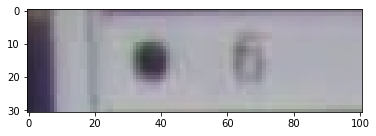

In [97]:
showImg(png2)

In [98]:
png2.shape[0]

31

In [113]:
#to do change the coord sys
def properYOLOFormat(bbox,info=False):
    """
    yolo format
    (x,y) being the center 
    <object-class> <x> <y> <width> <height>
    whatever the author of this ds was smoking
    <height> <y(left)> <x(topleft)> <width> <object-class>
    """
    df = pd.DataFrame(bbox)
    #creating an empty array
    deptArray = len(bbox['height'])
    packer = np.empty([deptArray, 5])
    # <object-class>
    packer[:,0:1:] = np.array(df['label']).reshape((deptArray, 1))
    # <x center>
    packer[:,1:2:] = np.array((df['left'] + (df['width'] / 2))).reshape((deptArray, 1))
    # <y center>
    packer[:,2:3:] = np.array((df['top'] + (df['height'] / 2))).reshape((deptArray, 1))
    # <width>
    packer[:,3:4:] = np.array(df['width']).reshape((deptArray, 1))
    # <height>
    packer[:,4:5:] = np.array(df['height']).reshape((deptArray, 1))
    if info:
        print(f'data before:\n {df}\n')
        print(f'data after <object-class>\t<x>\t<y>\t<width>\t<height>(downScaled):\n{packer}')
    return packer


In [117]:
idx = 2
currentImg = loadImgToArray(urldb+get_img_name(f, idx))
VHNSToYOLO = properYOLOFormat(get_img_boxes(f, idx),info=False)
VHNSToYOLO

array([[ 6. , 66.5, 14. , 11. , 16. ]])

In [118]:
#saveBBox(fileurl,boxData,imageArray,info=True,mode='default'):
saveBBox(urldb+txtNameFromJPG(get_img_name(f, idx)),VHNSToYOLO,currentImg,info=True,mode='yolo')


image width: 101 and height 31
before transform
<object-class>	<x>	<y>	<width>	<height>
[[ 6.  66.5 14.  11.  16. ]]
 after transform <object-class>	<x>	<y>	<width>	<height>:
[[6.         0.65841584 0.4516129  0.10891089 0.51612903]]


In [109]:
onlyfiles = [f for f in listdir(urldb) if isfile(join(urldb, f))]
sortedImg = sorted(onlyfiles)

In [112]:
sortedImgTxt[1]

'10.png'